In [68]:
import pandas as pd
import seaborn as sns

In [69]:
df = pd.read_csv('diabetes.csv')

In [70]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [71]:
# Input data
x = df.drop(['Outcome', 'Pregnancies', 'BloodPressure', 'SkinThickness'], axis = 1)

# Output data
y = df['Outcome']

<Axes: xlabel='Outcome', ylabel='count'>

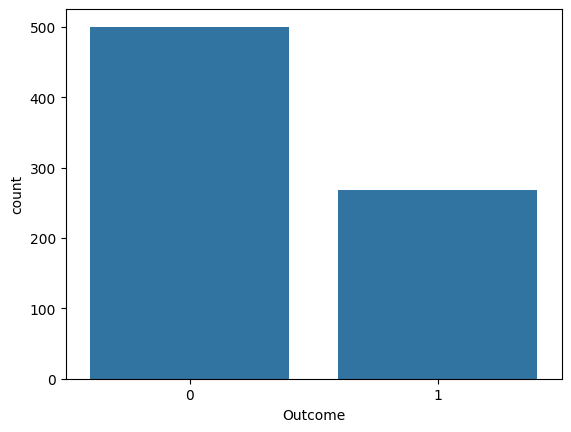

In [72]:
sns.countplot(x = y)

In [73]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [74]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [75]:
# Cross validation
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [76]:
x.shape

(768, 5)

In [77]:
x_train.shape

(576, 5)

In [78]:
x_test.shape

(192, 5)

In [79]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors=5)


In [80]:
knn.fit(x_train, y_train )

KNeighborsClassifier()

In [81]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [82]:
y_pred = knn.predict(x_test)

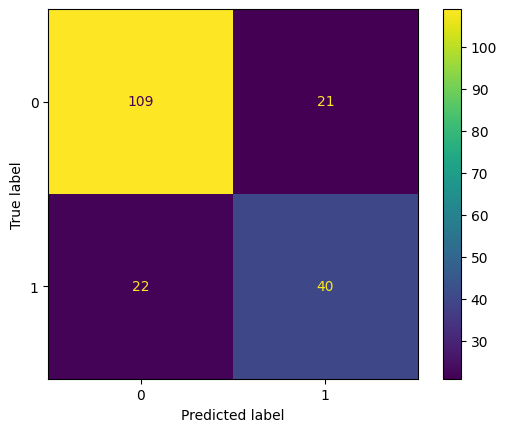

In [83]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [84]:
print("Accuracy : ",accuracy_score(y_test, y_pred)*100)

Accuracy :  77.60416666666666


In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       130
           1       0.66      0.65      0.65        62

    accuracy                           0.78       192
   macro avg       0.74      0.74      0.74       192
weighted avg       0.78      0.78      0.78       192



In [86]:
# Accuracy is Low for 1 
# Finding the value of k where the accuracy will be high

import matplotlib.pyplot as plt
import numpy as np


In [87]:
error = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)  
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

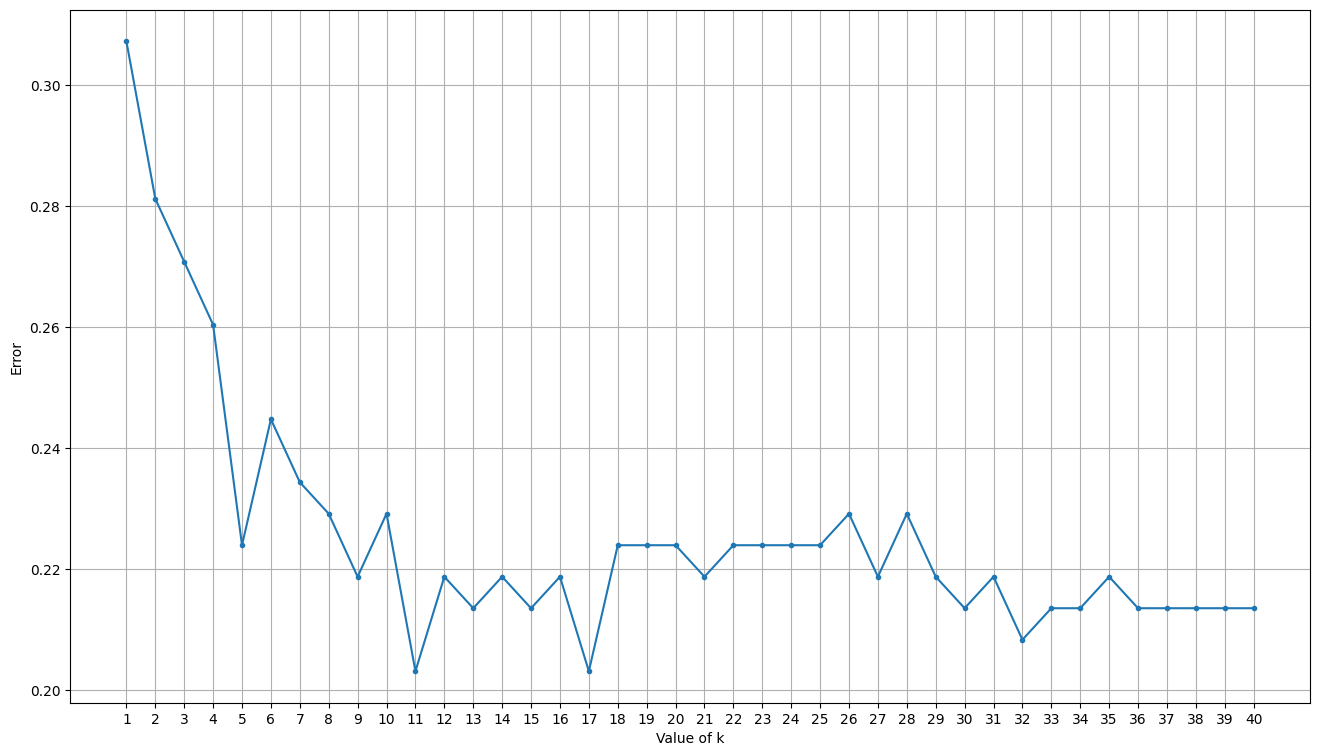

In [88]:
plt.figure(figsize=(16, 9))
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1, 41))
plt.plot(range(1, 41), error, marker='.')

In [89]:
# Found out the value of error will be lowest at k = 11

In [91]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       130
           1       0.72      0.61      0.66        62

    accuracy                           0.80       192
   macro avg       0.77      0.75      0.76       192
weighted avg       0.79      0.80      0.79       192



In [93]:
print("Accuracy : ",accuracy_score(y_test, y_pred)* 100)

Accuracy :  79.6875
